# Input

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd

In [3]:
data=pd.read_csv(r'dataset\NYPD_Complaint_Data_Historic.csv')

C:\Users\roshni\AppData\Local\Temp\ipykernel_14140\2082674159.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r'dataset\NYPD_Complaint_Data_Historic.csv')


In [4]:
data.iloc[0]

CMPLNT_NUM                                101109527
CMPLNT_FR_DT                             12/31/2015
CMPLNT_FR_TM                               23:45:00
CMPLNT_TO_DT                                    NaN
CMPLNT_TO_TM                                    NaN
RPT_DT                                   12/31/2015
KY_CD                                           113
OFNS_DESC                                   FORGERY
PD_CD                                         729.0
PD_DESC              FORGERY,ETC.,UNCLASSIFIED-FELO
CRM_ATPT_CPTD_CD                          COMPLETED
LAW_CAT_CD                                   FELONY
JURIS_DESC                         N.Y. POLICE DEPT
BORO_NM                                       BRONX
ADDR_PCT_CD                                    44.0
LOC_OF_OCCUR_DESC                            INSIDE
PREM_TYP_DESC                        BAR/NIGHT CLUB
PARKS_NM                                        NaN
HADEVELOPT                                      NaN
X_COORD_CD  

In [5]:
desc= pd.read_csv(r'dataset\Crime_Column_Description.csv')

In [6]:
desc

,Column,Description
0,CMPLNT_NUM,Randomly generated persistent ID for each comp...
1,CMPLNT_FR_DT,Exact date of occurrence for the reported even...
2,CMPLNT_FR_TM,Exact time of occurrence for the reported even...
3,CMPLNT_TO_DT,Ending date of occurrence for the reported eve...
4,CMPLNT_TO_TM,Ending time of occurrence for the reported eve...
5,RPT_DT,Date event was reported to police
6,KY_CD,Three digit offense classification code
7,OFNS_DESC,Description of offense corresponding with key ...
8,PD_CD,Three digit internal classification code (more...
9,PD_DESC,Description of internal classification corresp...


In [7]:
data=data.drop(['CMPLNT_NUM','CMPLNT_TO_DT','CMPLNT_TO_TM','PD_CD','PD_DESC','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','PARKS_NM','HADEVELOPT','X_COORD_CD','Y_COORD_CD','Lat_Lon'],axis=1)

In [8]:
data.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,Latitude,Longitude
0,12/31/2015,23:45:00,12/31/2015,113,FORGERY,COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,44.0,40.828848,-73.916661
1,12/31/2015,23:36:00,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,103.0,40.697338,-73.784557
2,12/31/2015,23:30:00,12/31/2015,117,DANGEROUS DRUGS,COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,28.0,40.802607,-73.945052
3,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,105.0,40.654549,-73.726339
4,12/31/2015,23:25:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13.0,40.738002,-73.987891


# Checking for NaN (missing) values

In [9]:
data['Longitude'].isna().sum()

32417

In [10]:
data['Latitude'].isna().sum()

32417

In [11]:
data['ADDR_PCT_CD'].isna().sum()

1

In [12]:
data['BORO_NM'].isna().sum()    

0

In [13]:
data['JURIS_DESC'].isna().sum()

0

In [14]:
data['CRM_ATPT_CPTD_CD'].isna().sum()

1

In [15]:
data['OFNS_DESC'].isna().sum()  

2880

In [16]:
data['KY_CD'].isna().sum()

0

In [17]:
data['RPT_DT'].isna().sum() 

0

In [18]:
data['CMPLNT_FR_DT'].isna().sum()

65

In [19]:
data['CMPLNT_FR_TM'].isna().sum()


0

In [20]:
data.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,Latitude,Longitude
0,12/31/2015,23:45:00,12/31/2015,113,FORGERY,COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,44.0,40.828848,-73.916661
1,12/31/2015,23:36:00,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,103.0,40.697338,-73.784557
2,12/31/2015,23:30:00,12/31/2015,117,DANGEROUS DRUGS,COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,28.0,40.802607,-73.945052
3,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,105.0,40.654549,-73.726339
4,12/31/2015,23:25:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13.0,40.738002,-73.987891


In [21]:
data.dropna(axis=0,inplace=True)

In [22]:
data.shape

(1013303, 12)

In [23]:
data['CMPLNT_FR_DT'] = pd.to_datetime(data['CMPLNT_FR_DT'], errors='coerce', format='%m/%d/%Y')
# data['CMPLNT_FR_TM']=pd.to_datetime(data['CMPLNT_FR_TM'],errors='coerce',format='%H:%M:%S')
data['RPT_DT'] = pd.to_datetime(data['RPT_DT'], errors='coerce', format='%m/%d/%Y')


In [24]:
data.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,Latitude,Longitude
0,2015-12-31,23:45:00,2015-12-31,113,FORGERY,COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,44.0,40.828848,-73.916661
1,2015-12-31,23:36:00,2015-12-31,101,MURDER & NON-NEGL. MANSLAUGHTER,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,103.0,40.697338,-73.784557
2,2015-12-31,23:30:00,2015-12-31,117,DANGEROUS DRUGS,COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,28.0,40.802607,-73.945052
3,2015-12-31,23:30:00,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,105.0,40.654549,-73.726339
4,2015-12-31,23:25:00,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13.0,40.738002,-73.987891


In [25]:
type(data['CMPLNT_FR_DT'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [26]:
data['CMPLNT_FR_TM'] = pd.to_datetime(data['CMPLNT_FR_TM'], format='%H:%M:%S').dt.time

In [27]:
data.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,Latitude,Longitude
0,2015-12-31,23:45:00,2015-12-31,113,FORGERY,COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,44.0,40.828848,-73.916661
1,2015-12-31,23:36:00,2015-12-31,101,MURDER & NON-NEGL. MANSLAUGHTER,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,103.0,40.697338,-73.784557
2,2015-12-31,23:30:00,2015-12-31,117,DANGEROUS DRUGS,COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,28.0,40.802607,-73.945052
3,2015-12-31,23:30:00,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,105.0,40.654549,-73.726339
4,2015-12-31,23:25:00,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13.0,40.738002,-73.987891


In [28]:
data['CRM_ATPT_CPTD_CD']=data['CRM_ATPT_CPTD_CD'].map({'COMPLETED':1,'ATTEMPTED':0})

<Axes: xlabel='CRM_ATPT_CPTD_CD'>

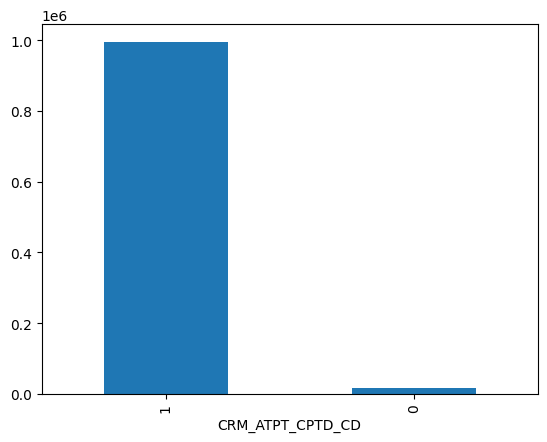

In [29]:
data['CRM_ATPT_CPTD_CD'].value_counts().plot(kind='bar')

#this data does not provide any additional information about the time,type, or location of the crime

<Axes: xlabel='LAW_CAT_CD'>

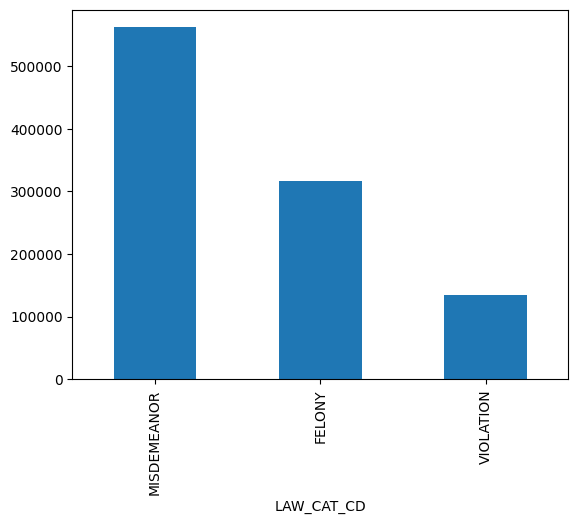

In [30]:
data['LAW_CAT_CD'].value_counts().plot(kind='bar')
# should be mapped or not??

In [31]:
data['OFNS_DESC'].value_counts()
#Highly imbalanced data, should be used or not?


OFNS_DESC
PETIT LARCENY                       176487
HARRASSMENT 2                       131915
ASSAULT 3 & RELATED OFFENSES        113206
CRIMINAL MISCHIEF & RELATED OF      100756
GRAND LARCENY                        94367
                                     ...  
ABORTION                                 2
ADMINISTRATIVE CODES                     2
FORTUNE TELLING                          1
OTHER STATE LAWS (NON PENAL LAW)         1
LOITERING FOR DRUG PURPOSES              1
Name: count, Length: 67, dtype: int64

{'PETIT LARCENY': 176487, 'HARRASSMENT 2': 131915, 'ASSAULT 3 & RELATED OFFENSES': 113206, 'CRIMINAL MISCHIEF & RELATED OF': 100756, 'GRAND LARCENY': 94367, 'DANGEROUS DRUGS': 56042, 'OFF. AGNST PUB ORD SENSBLTY &': 44441, 'FELONY ASSAULT': 43480, 'ROBBERY': 36143, 'BURGLARY': 34711, 'MISCELLANEOUS PENAL LAW': 28796, 'DANGEROUS WEAPONS': 22294, 'OFFENSES AGAINST PUBLIC ADMINI': 21086, 'GRAND LARCENY OF MOTOR VEHICLE': 15937, 'INTOXICATED & IMPAIRED DRIVING': 14331, 'VEHICLE AND TRAFFIC LAWS': 11599, 'FORGERY': 10409, 'THEFT-FRAUD': 10395, 'CRIMINAL TRESPASS': 10185, 'FRAUDS': 7757, 'POSSESSION OF STOLEN PROPERTY': 4842, 'UNAUTHORIZED USE OF A VEHICLE': 3431, 'OTHER OFFENSES RELATED TO THEF': 3019, 'OFFENSES INVOLVING FRAUD': 2931, 'OFFENSES AGAINST THE PERSON': 2704, 'ARSON': 2439, 'ADMINISTRATIVE CODE': 2306, 'OTHER STATE LAWS (NON PENAL LA': 1021, 'THEFT OF SERVICES': 985, 'NYS LAWS-UNCLASSIFIED FELONY': 939, 'MURDER & NON-NEGL. MANSLAUGHTER': 733, "BURGLAR'S TOOLS": 706, 'GAMBLING':

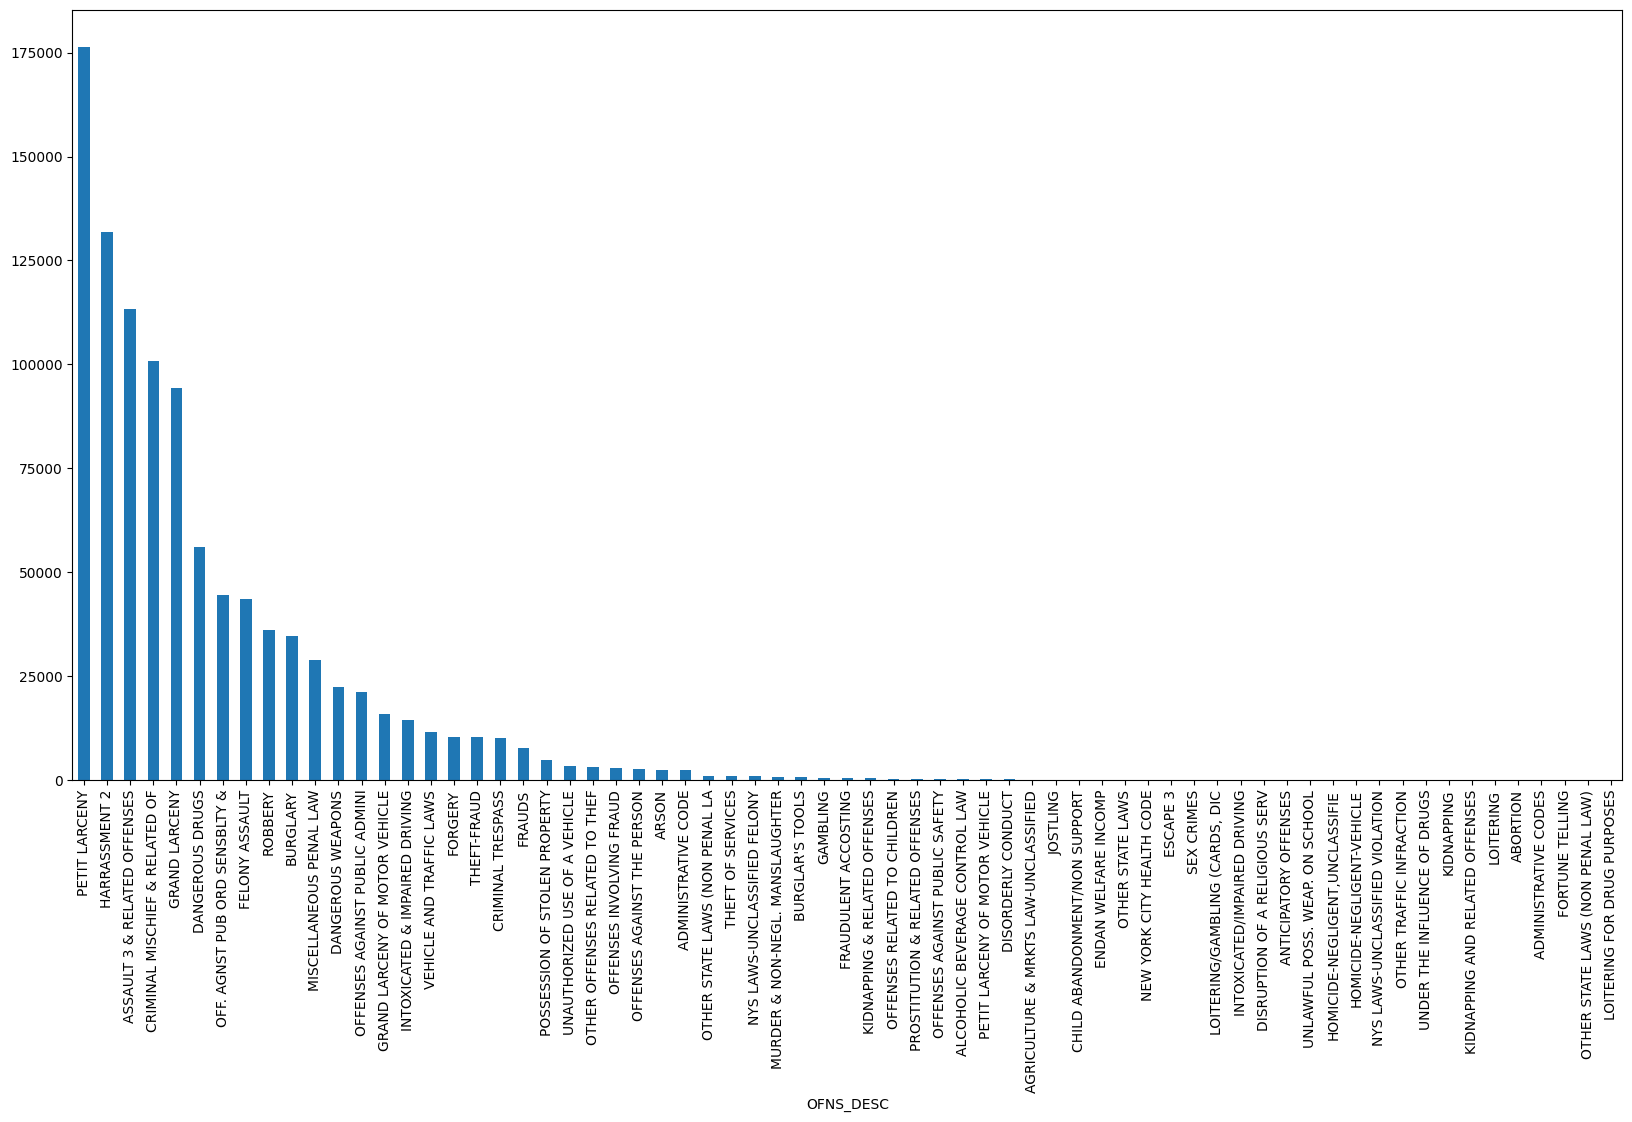

In [32]:
data['OFNS_DESC'].value_counts().plot(kind='bar',figsize=(20,10))
crime_counts = data['OFNS_DESC'].value_counts().to_dict()
print(crime_counts)

# Preprocessing

In [33]:
data['BORO_NM'].value_counts()

BORO_NM
BROOKLYN         308152
MANHATTAN        236881
BRONX            219512
QUEENS           201448
STATEN ISLAND     47310
Name: count, dtype: int64

In [34]:
map={'BRONX':1,'BROOKLYN':2,'MANHATTAN':3,'QUEENS':4,'STATEN ISLAND':5}

In [35]:
data['BORO_NM']=data['BORO_NM'].map(map)

In [36]:
data.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,Latitude,Longitude
0,2015-12-31,23:45:00,2015-12-31,113,FORGERY,1,FELONY,N.Y. POLICE DEPT,1,44.0,40.828848,-73.916661
1,2015-12-31,23:36:00,2015-12-31,101,MURDER & NON-NEGL. MANSLAUGHTER,1,FELONY,N.Y. POLICE DEPT,4,103.0,40.697338,-73.784557
2,2015-12-31,23:30:00,2015-12-31,117,DANGEROUS DRUGS,1,FELONY,N.Y. POLICE DEPT,3,28.0,40.802607,-73.945052
3,2015-12-31,23:30:00,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,1,MISDEMEANOR,N.Y. POLICE DEPT,4,105.0,40.654549,-73.726339
4,2015-12-31,23:25:00,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,1,MISDEMEANOR,N.Y. POLICE DEPT,3,13.0,40.738002,-73.987891


In [37]:
data['Month'] = data['CMPLNT_FR_DT'].dt.month
def get_season(month):
    if pd.isna(month): 
        return 'Unknown'
    month = int(month)
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Unknown'

data['Season'] = data['Month'].apply(get_season)

print(data[['CMPLNT_FR_DT', 'Month', 'Season']].head())

print("\nSeason Value Counts:")
print(data['Season'].value_counts())

  CMPLNT_FR_DT  Month  Season
0   2015-12-31   12.0  Winter
1   2015-12-31   12.0  Winter
2   2015-12-31   12.0  Winter
3   2015-12-31   12.0  Winter
4   2015-12-31   12.0  Winter

Season Value Counts:
Season
Fall       278667
Summer     255936
Winter     241515
Spring     237179
Unknown         6
Name: count, dtype: int64


In [38]:
data.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,Latitude,Longitude,Month,Season
0,2015-12-31,23:45:00,2015-12-31,113,FORGERY,1,FELONY,N.Y. POLICE DEPT,1,44.0,40.828848,-73.916661,12.0,Winter
1,2015-12-31,23:36:00,2015-12-31,101,MURDER & NON-NEGL. MANSLAUGHTER,1,FELONY,N.Y. POLICE DEPT,4,103.0,40.697338,-73.784557,12.0,Winter
2,2015-12-31,23:30:00,2015-12-31,117,DANGEROUS DRUGS,1,FELONY,N.Y. POLICE DEPT,3,28.0,40.802607,-73.945052,12.0,Winter
3,2015-12-31,23:30:00,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,1,MISDEMEANOR,N.Y. POLICE DEPT,4,105.0,40.654549,-73.726339,12.0,Winter
4,2015-12-31,23:25:00,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,1,MISDEMEANOR,N.Y. POLICE DEPT,3,13.0,40.738002,-73.987891,12.0,Winter


In [39]:
import h3.api.basic_str as h3
import pandas as pd

resolution = 7 


def latlon_to_h3(lat, lon, res=resolution):
    return h3.latlng_to_cell(lat, lon, res)

data["h3_index"] = data.apply(lambda row: latlon_to_h3(row["Latitude"], row["Longitude"]), axis=1)

crime_density = data["h3_index"].value_counts().reset_index()
crime_density.columns = ["h3_index", "crime_count"]

print(crime_density.head())


          h3_index  crime_count
0  872a100d2ffffff        35939
1  872a1008dffffff        32421
2  872a100acffffff        30349
3  872a100a8ffffff        26948
4  872a100abffffff        26317


In [40]:
import folium
import geopandas as gpd
from shapely.geometry import Polygon
import h3.api.basic_str as h3
from folium.plugins import HeatMap

# Convert H3 indexes to polygon geometries
def h3_to_polygon(h3_index):
    boundary = h3.cell_to_boundary(h3_index)  # Use the updated function
    return Polygon(boundary)

# Convert H3 indexes to latitude and longitude
def h3_to_latlon(h3_index):
    lat, lon = h3.cell_to_latlng(h3_index)
    return lat, lon

crime_density["geometry"] = crime_density["h3_index"].apply(h3_to_polygon)
crime_gdf = gpd.GeoDataFrame(crime_density, geometry="geometry", crs="EPSG:4326")

m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)  # Center on NYC

# Prepare data for HeatMap
heat_data = [[h3_to_latlon(row["h3_index"])[0], h3_to_latlon(row["h3_index"])[1], row["crime_count"]] for index, row in crime_density.iterrows()]

# Add HeatMap to the map
HeatMap(heat_data).add_to(m)

# Display the map
m

In [41]:
data.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,Latitude,Longitude,Month,Season,h3_index
0,2015-12-31,23:45:00,2015-12-31,113,FORGERY,1,FELONY,N.Y. POLICE DEPT,1,44.0,40.828848,-73.916661,12.0,Winter,872a100a8ffffff
1,2015-12-31,23:36:00,2015-12-31,101,MURDER & NON-NEGL. MANSLAUGHTER,1,FELONY,N.Y. POLICE DEPT,4,103.0,40.697338,-73.784557,12.0,Winter,872a100e9ffffff
2,2015-12-31,23:30:00,2015-12-31,117,DANGEROUS DRUGS,1,FELONY,N.Y. POLICE DEPT,3,28.0,40.802607,-73.945052,12.0,Winter,872a1008dffffff
3,2015-12-31,23:30:00,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,1,MISDEMEANOR,N.Y. POLICE DEPT,4,105.0,40.654549,-73.726339,12.0,Winter,872a103a6ffffff
4,2015-12-31,23:25:00,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,1,MISDEMEANOR,N.Y. POLICE DEPT,3,13.0,40.738002,-73.987891,12.0,Winter,872a100d2ffffff


In [42]:
data['CMPLNT_FR_DT'] = pd.to_datetime(data['CMPLNT_FR_DT'], errors='coerce')
data['CMPLNT_FR_TM'] = pd.to_datetime(data['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce').dt.time

# Extract useful features from the date and time
data['Year'] = data['CMPLNT_FR_DT'].dt.year
data['Month'] = data['CMPLNT_FR_DT'].dt.month
data['Day'] = data['CMPLNT_FR_DT'].dt.day
data['Hour'] = data['CMPLNT_FR_TM'].apply(lambda x: x.hour if pd.notnull(x) else -1)
data['Minute'] = data['CMPLNT_FR_TM'].apply(lambda x: x.minute if pd.notnull(x) else -1)
data['DayOfWeek'] = data['CMPLNT_FR_DT'].dt.dayofweek

# Drop the original date and time columns
# data = data.drop(columns=['CMPLNT_FR_DT', 'CMPLNT_FR_TM'])


In [43]:
data.head() 

,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,Latitude,Longitude,Month,Season,h3_index,Year,Day,Hour,Minute,DayOfWeek
0,2015-12-31,23:45:00,2015-12-31,113,FORGERY,1,FELONY,N.Y. POLICE DEPT,1,44.0,40.828848,-73.916661,12.0,Winter,872a100a8ffffff,2015.0,31.0,23,45,3.0
1,2015-12-31,23:36:00,2015-12-31,101,MURDER & NON-NEGL. MANSLAUGHTER,1,FELONY,N.Y. POLICE DEPT,4,103.0,40.697338,-73.784557,12.0,Winter,872a100e9ffffff,2015.0,31.0,23,36,3.0
2,2015-12-31,23:30:00,2015-12-31,117,DANGEROUS DRUGS,1,FELONY,N.Y. POLICE DEPT,3,28.0,40.802607,-73.945052,12.0,Winter,872a1008dffffff,2015.0,31.0,23,30,3.0
3,2015-12-31,23:30:00,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,1,MISDEMEANOR,N.Y. POLICE DEPT,4,105.0,40.654549,-73.726339,12.0,Winter,872a103a6ffffff,2015.0,31.0,23,30,3.0
4,2015-12-31,23:25:00,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,1,MISDEMEANOR,N.Y. POLICE DEPT,3,13.0,40.738002,-73.987891,12.0,Winter,872a100d2ffffff,2015.0,31.0,23,25,3.0


In [44]:
def group_crimes_refined(crime, count):
    crime_upper = crime.upper()
    
    threshold = 20000

    if 'ROBBERY' in crime_upper:
        return 'Robbery' 
    if 'LARCENY' in crime_upper or 'THEFT' in crime_upper:
        return 'Larceny/Theft'
    if 'ASSAULT' in crime_upper or 'HARRASSMENT' in crime_upper:
        return 'Assault/Harassment'
    if 'MISCHIEF' in crime_upper or 'BURGLARY' in crime_upper or 'TRESPASS' in crime_upper:
        return 'Property Crime/Burglary'
    if 'DRUG' in crime_upper:
        return 'Drug Offenses'
    if 'PUBLIC' in crime_upper or 'ADMINI' in crime_upper or 'MISCELLANEOUS PENAL LAW' in crime_upper or 'ORD SENSBLTY' in crime_upper:
        return 'Public Order/Admin Offenses'

    return 'Others'

if 'crime_counts' not in locals():
     print("Error: 'crime_counts' dictionary not found. Please run the cell that defines it first.")
else:
    crime_group_mapping_refined = {crime: group_crimes_refined(crime, count) for crime, count in crime_counts.items()}

    if 'data' in locals() and 'OFNS_DESC' in data.columns:
        data['Crime Group'] = data['OFNS_DESC'].map(crime_group_mapping_refined)
        print("Refined crime groups created and added to DataFrame:")
        print(data['Crime Group'].value_counts())

        grouped_counts_refined = data.groupby('Crime Group').size().reset_index(name='count')
        print("\nCounts per Refined Crime Group:")
        print(grouped_counts_refined.sort_values('count', ascending=False))
    else:
        print("DataFrame 'data' or column 'OFNS_DESC' not found. Cannot apply mapping.")
        print("\nRefined Crime Group Mapping Dictionary:")
        print({k: v for i, (k, v) in enumerate(crime_group_mapping_refined.items()) if i < 20}) # Print first 20 mappings


Refined crime groups created and added to DataFrame:
Crime Group
Larceny/Theft                  298325
Assault/Harassment             288601
Property Crime/Burglary        145652
Public Order/Admin Offenses     96801
Others                          91736
Drug Offenses                   56045
Robbery                         36143
Name: count, dtype: int64

Counts per Refined Crime Group:
                   Crime Group   count
2                Larceny/Theft  298325
0           Assault/Harassment  288601
4      Property Crime/Burglary  145652
5  Public Order/Admin Offenses   96801
3                       Others   91736
1                Drug Offenses   56045
6                      Robbery   36143


In [45]:
data['Crime Group'] = data['OFNS_DESC'].map(crime_group_mapping_refined)

In [46]:

data.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,...,Longitude,Month,Season,h3_index,Year,Day,Hour,Minute,DayOfWeek,Crime Group
0,2015-12-31,23:45:00,2015-12-31,113,FORGERY,1,FELONY,N.Y. POLICE DEPT,1,44.0,...,-73.916661,12.0,Winter,872a100a8ffffff,2015.0,31.0,23,45,3.0,Others
1,2015-12-31,23:36:00,2015-12-31,101,MURDER & NON-NEGL. MANSLAUGHTER,1,FELONY,N.Y. POLICE DEPT,4,103.0,...,-73.784557,12.0,Winter,872a100e9ffffff,2015.0,31.0,23,36,3.0,Others
2,2015-12-31,23:30:00,2015-12-31,117,DANGEROUS DRUGS,1,FELONY,N.Y. POLICE DEPT,3,28.0,...,-73.945052,12.0,Winter,872a1008dffffff,2015.0,31.0,23,30,3.0,Drug Offenses
3,2015-12-31,23:30:00,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,1,MISDEMEANOR,N.Y. POLICE DEPT,4,105.0,...,-73.726339,12.0,Winter,872a103a6ffffff,2015.0,31.0,23,30,3.0,Assault/Harassment
4,2015-12-31,23:25:00,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,1,MISDEMEANOR,N.Y. POLICE DEPT,3,13.0,...,-73.987891,12.0,Winter,872a100d2ffffff,2015.0,31.0,23,25,3.0,Assault/Harassment


In [47]:
data= data.drop(['RPT_DT','KY_CD','CRM_ATPT_CPTD_CD','JURIS_DESC','ADDR_PCT_CD','LAW_CAT_CD','OFNS_DESC'],axis=1)

In [48]:
data.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,BORO_NM,Latitude,Longitude,Month,Season,h3_index,Year,Day,Hour,Minute,DayOfWeek,Crime Group
0,2015-12-31,23:45:00,1,40.828848,-73.916661,12.0,Winter,872a100a8ffffff,2015.0,31.0,23,45,3.0,Others
1,2015-12-31,23:36:00,4,40.697338,-73.784557,12.0,Winter,872a100e9ffffff,2015.0,31.0,23,36,3.0,Others
2,2015-12-31,23:30:00,3,40.802607,-73.945052,12.0,Winter,872a1008dffffff,2015.0,31.0,23,30,3.0,Drug Offenses
3,2015-12-31,23:30:00,4,40.654549,-73.726339,12.0,Winter,872a103a6ffffff,2015.0,31.0,23,30,3.0,Assault/Harassment
4,2015-12-31,23:25:00,3,40.738002,-73.987891,12.0,Winter,872a100d2ffffff,2015.0,31.0,23,25,3.0,Assault/Harassment


In [49]:
data['h3_index'].nunique()


202

# Simple Classification Model Training

This particular training schedule shows that the task can not be modelled as a traditional classification task as binning the crime groups into spatial bins across the temporal dimension. We need to change it to a regression task, probably a crime hostpot vs Non-hotspot task, which can give us hotspots across the time domain.

In [103]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [101]:
X= data.drop(['h3_index','Latitude','Longitude','CMPLNT_FR_DT','CMPLNT_FR_TM'],axis=1)
y= data['h3_index']

In [104]:
label_encoder = LabelEncoder()
y_encoded= label_encoder.fit_transform(y)   

In [105]:
X['Season']=label_encoder.fit_transform(X['Season'])
X['Crime Group']=label_encoder.fit_transform(X['Crime Group'])
# data.head()

In [106]:
X.head()

,BORO_NM,Month,Season,Year,Day,Hour,Minute,DayOfWeek,Crime Group
0,1,12.0,4,2015.0,31.0,23,45,3.0,3
1,4,12.0,4,2015.0,31.0,23,36,3.0,3
2,3,12.0,4,2015.0,31.0,23,30,3.0,1
3,4,12.0,4,2015.0,31.0,23,30,3.0,0
4,3,12.0,4,2015.0,31.0,23,25,3.0,0


In [132]:
x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42,shuffle=True, stratify=y_encoded)

In [133]:
x_train[:5]

,BORO_NM,Month,Season,Year,Day,Hour,Minute,DayOfWeek,Crime Group
948639,3,1.0,4,2014.0,17.0,14,35,4.0,0
827282,2,4.0,1,2014.0,22.0,5,0,1.0,0
174636,3,8.0,2,2015.0,22.0,5,50,5.0,0
677303,1,8.0,2,2014.0,5.0,11,5,1.0,5
324286,4,5.0,1,2015.0,8.0,18,20,4.0,0


In [134]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [135]:
model= XGBClassifier(enable_categorical=True)

In [136]:
a=set(np.unique(y_test))
b=set(np.unique(y_train))
print(a-b)


set()


In [137]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [138]:
y_pred=model.predict(x_test)

In [139]:
print(accuracy_score(y_test,y_pred))

0.5808468328884195


# Plots and visualization

In [50]:
data.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,BORO_NM,Latitude,Longitude,Month,Season,h3_index,Year,Day,Hour,Minute,DayOfWeek,Crime Group
0,2015-12-31,23:45:00,1,40.828848,-73.916661,12.0,Winter,872a100a8ffffff,2015.0,31.0,23,45,3.0,Others
1,2015-12-31,23:36:00,4,40.697338,-73.784557,12.0,Winter,872a100e9ffffff,2015.0,31.0,23,36,3.0,Others
2,2015-12-31,23:30:00,3,40.802607,-73.945052,12.0,Winter,872a1008dffffff,2015.0,31.0,23,30,3.0,Drug Offenses
3,2015-12-31,23:30:00,4,40.654549,-73.726339,12.0,Winter,872a103a6ffffff,2015.0,31.0,23,30,3.0,Assault/Harassment
4,2015-12-31,23:25:00,3,40.738002,-73.987891,12.0,Winter,872a100d2ffffff,2015.0,31.0,23,25,3.0,Assault/Harassment


In [51]:
data['month']=data['CMPLNT_FR_DT'].dt.month
data['time_bin'] = data['CMPLNT_FR_DT'].dt.to_period('M').astype(str)

In [52]:
months={1.0:'January',2.0:'February',3.0:'March',4.0:'April',5.0:'May',6.0:'June',7.0:'July',8.0:'August',9.0:'September',10.0:'October',11.0:'November',12.0:'December'}
data['month_names']=data['month'].map(months)

In [53]:
data.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,BORO_NM,Latitude,Longitude,Month,Season,h3_index,Year,Day,Hour,Minute,DayOfWeek,Crime Group,month,time_bin,month_names
0,2015-12-31,23:45:00,1,40.828848,-73.916661,12.0,Winter,872a100a8ffffff,2015.0,31.0,23,45,3.0,Others,12.0,2015-12,December
1,2015-12-31,23:36:00,4,40.697338,-73.784557,12.0,Winter,872a100e9ffffff,2015.0,31.0,23,36,3.0,Others,12.0,2015-12,December
2,2015-12-31,23:30:00,3,40.802607,-73.945052,12.0,Winter,872a1008dffffff,2015.0,31.0,23,30,3.0,Drug Offenses,12.0,2015-12,December
3,2015-12-31,23:30:00,4,40.654549,-73.726339,12.0,Winter,872a103a6ffffff,2015.0,31.0,23,30,3.0,Assault/Harassment,12.0,2015-12,December
4,2015-12-31,23:25:00,3,40.738002,-73.987891,12.0,Winter,872a100d2ffffff,2015.0,31.0,23,25,3.0,Assault/Harassment,12.0,2015-12,December


In [85]:
counts = data.groupby(['h3_index', 'month','Crime Group']).size().reset_index(name='crime_count')
counts.shape


(14572, 4)

In [84]:
counts = data.groupby(['h3_index','Crime Group']).size().reset_index(name='crime_count')
counts.shape


(1350, 3)

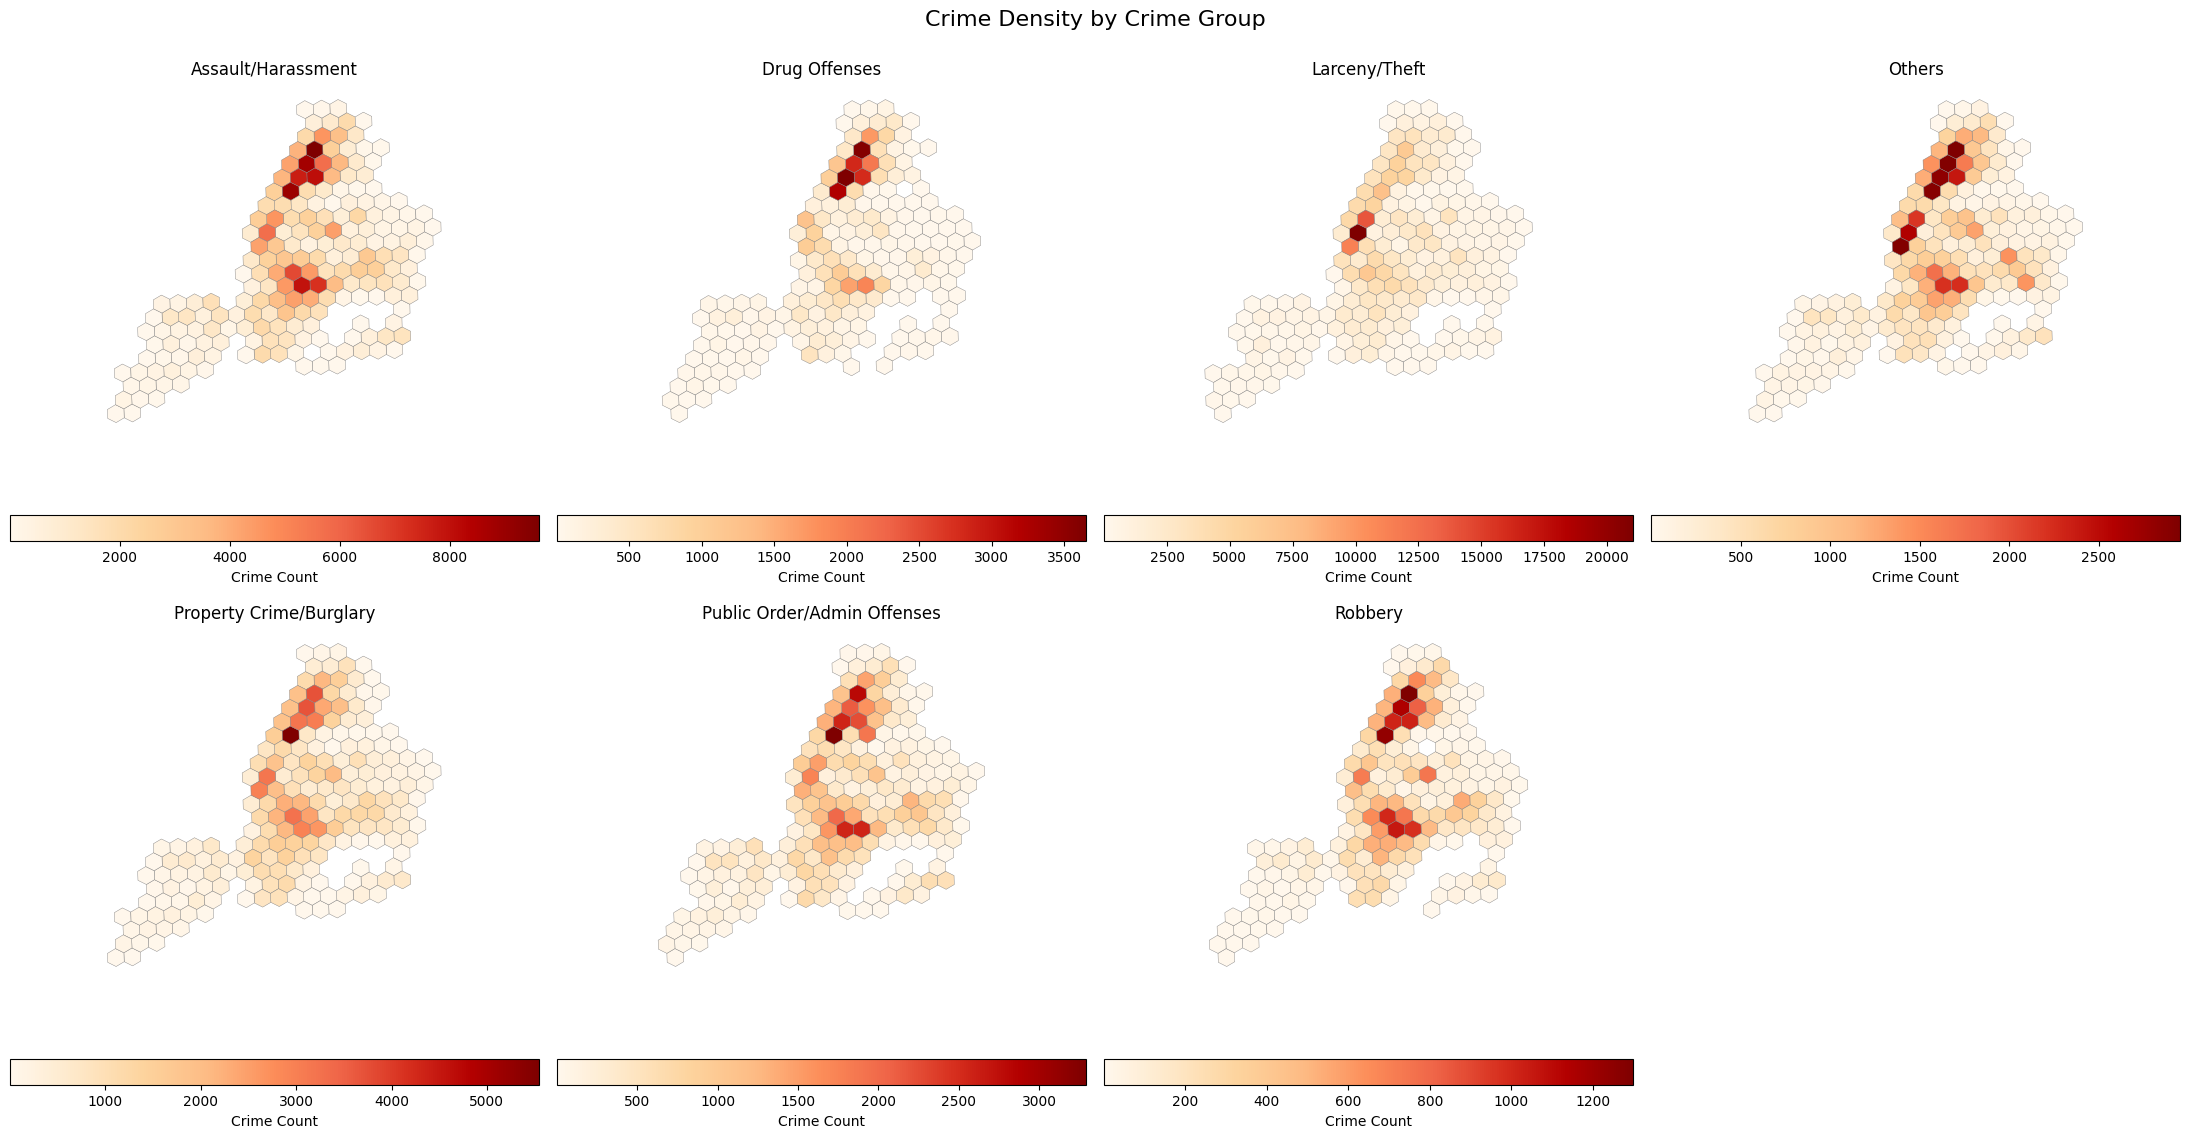

In [89]:
import geopandas as gpd

agg = data.groupby([ 'Crime Group', 'h3_index']) \
        .size().reset_index(name='count')

def h3_to_polygon(h):
    boundary_coords= h3.cell_to_boundary(h)
    boundary=[(lon,lat) for lat,lon in boundary_coords]
    return Polygon(boundary)

agg['geometry'] = agg['h3_index'].apply(h3_to_polygon)
gdf = gpd.GeoDataFrame(agg, geometry='geometry', crs='EPSG:4326')

crime_groups = sorted(data['Crime Group'].unique())

vmin = gdf['count'].min()
vmax = gdf['count'].max()
import matplotlib.pyplot as plt

# Create a figure with subplots. Adjust rows/cols as needed.
# Since there are 7 crime groups, 2 rows and 4 columns will suffice.
fig, axs = plt.subplots(2, 4, figsize=(22, 12))
axs = axs.flatten() # Flatten the axes array for easier indexing

# Loop through each crime group and plot on a subplot
for idx, crime in enumerate(crime_groups):
    ax = axs[idx]
    subset = gdf[gdf['Crime Group'] == crime]

    if subset.empty:
        ax.set_title(f"{crime} (No data)")
        ax.axis('off')
        continue

    # Plot the data for the current crime group
    subset.plot(ax=ax, column='count', cmap='OrRd', edgecolor='gray', linewidth=0.3,
                legend=True, legend_kwds={'label': "Crime Count", 'orientation': "horizontal"})
    ax.set_title(crime)
    ax.axis('off')

# Turn off axes for any unused subplots
for i in range(len(crime_groups), len(axs)):
    axs[i].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
fig.suptitle('Crime Density by Crime Group', fontsize=16) # Add a main title
plt.show()

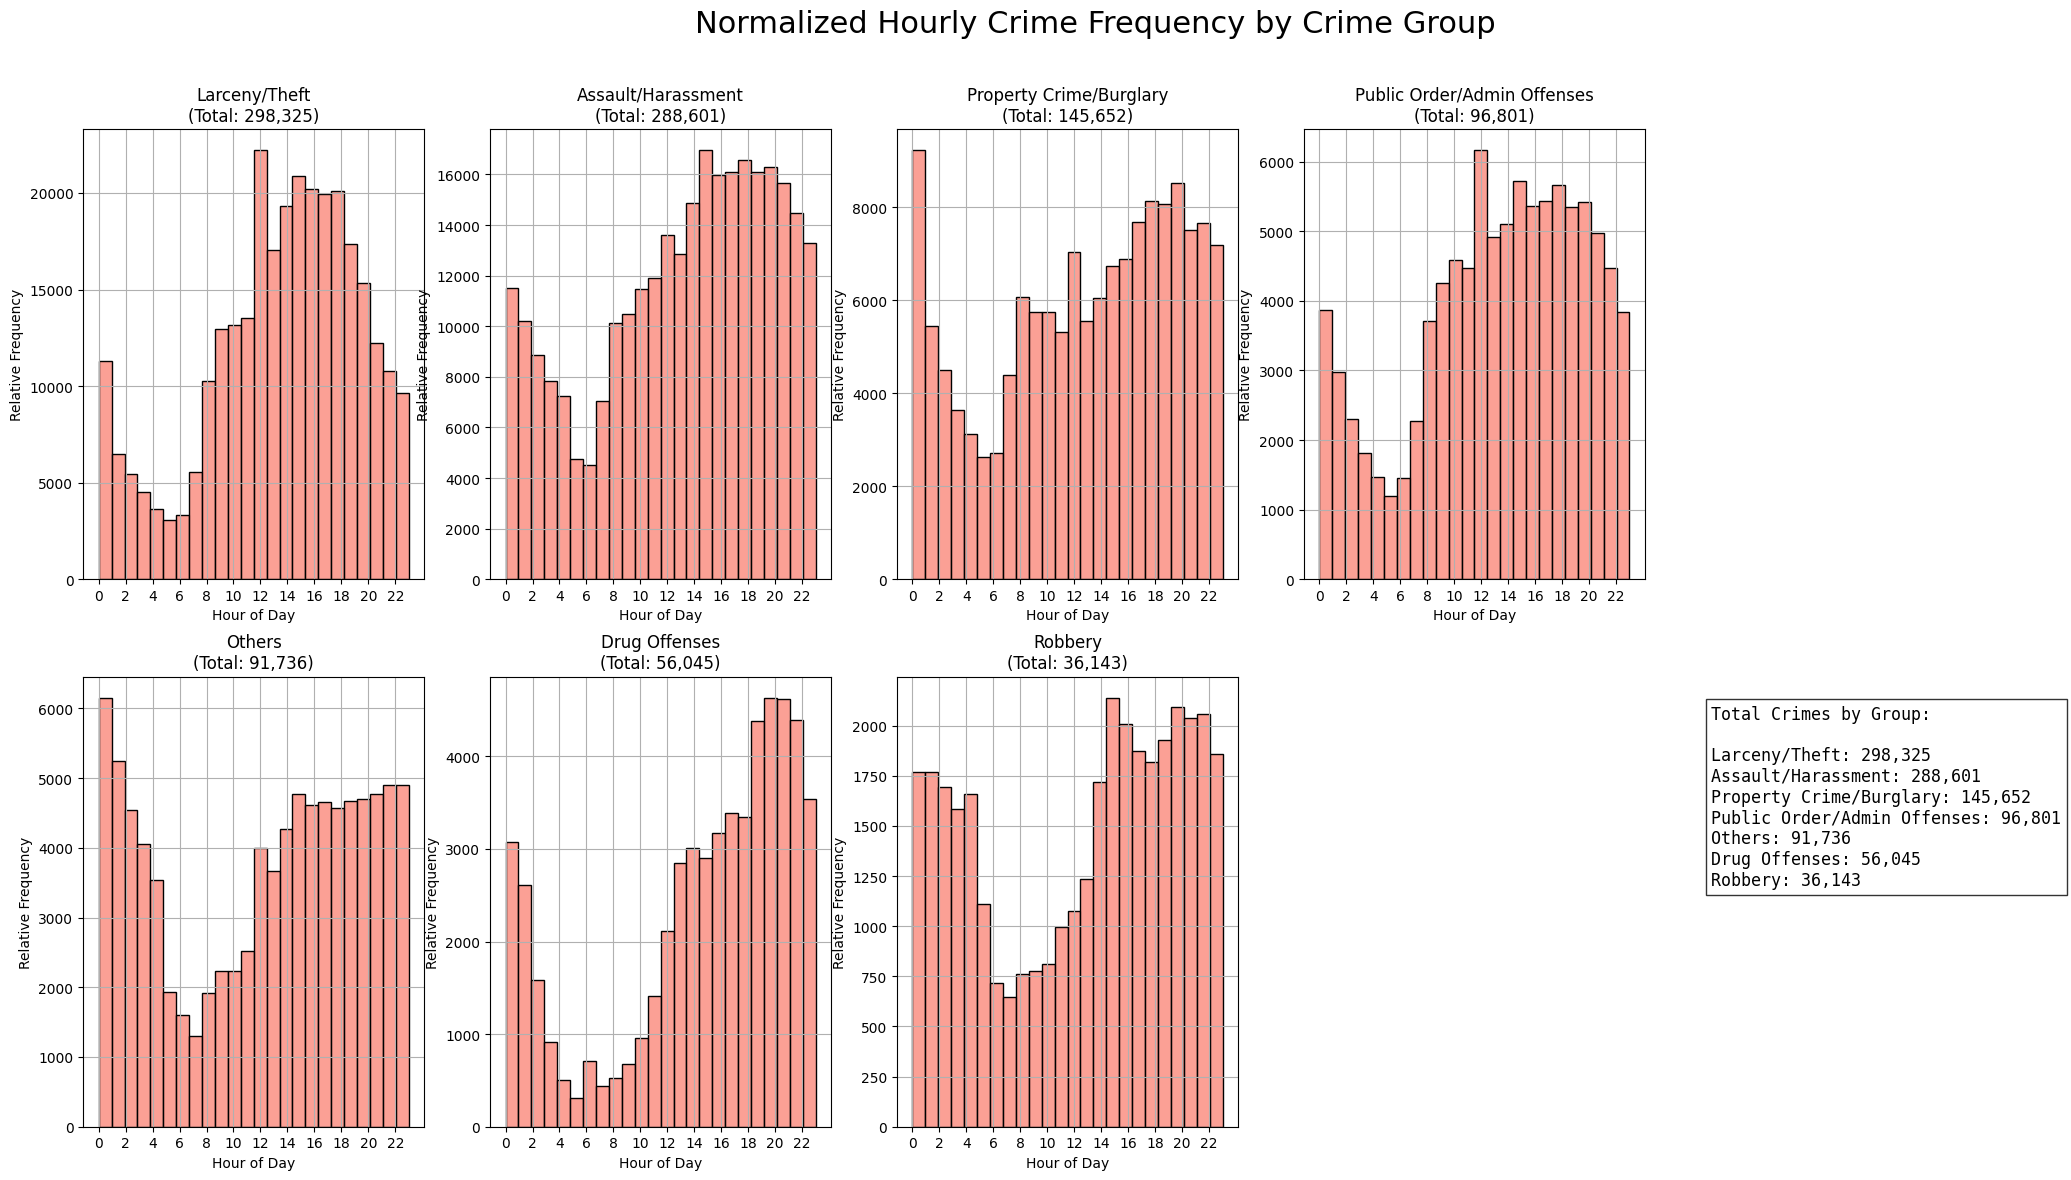

In [68]:

crime_counts = data['Crime Group'].value_counts().sort_values(ascending=False)
crime_groups = crime_counts.index.tolist()

# Set up the figure
fig, axs = plt.subplots(2, 4, figsize=(22, 12))
fig.suptitle("Normalized Hourly Crime Frequency by Crime Group", fontsize=22)

# Plot histograms
for idx, crime in enumerate(crime_groups):
    ax = axs[idx // 4, idx % 4]
    subset = data[data['Crime Group'] == crime]

    sns.histplot(
        subset['Hour'], 
        bins=24, 
        ax=ax, 
        
        kde=False, 
        color='salmon', 
        edgecolor='black'
    )
    ax.set_title(f"{crime}\n(Total: {len(subset):,})")
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Relative Frequency')
    ax.set_xticks(range(0, 24, 2))
   
    ax.grid(True)

# Turn off extra subplot if needed
if len(crime_groups) < 8:
    axs[-1, -1].axis('off')

# Create a legend box with total counts
legend_text = "\n".join([f"{grp}: {count:,}" for grp, count in crime_counts.items()])
fig.text(0.78, 0.25, f"Total Crimes by Group:\n\n{legend_text}",
         bbox=dict(facecolor='white', alpha=0.8),
         fontsize=12, family='monospace')

plt.tight_layout()
plt.subplots_adjust(top=0.88, right=0.75)
plt.savefig("hourly_crime_histograms_with_legend.png", dpi=300)
plt.show()


In [104]:
import imageio.v2 as imageio
import os
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
import h3.api.basic_str as h3
import pandas as pd
import numpy as np # Import numpy for isnan check

# --- Ensure necessary data is present ---
if 'data' not in locals() or not all(col in data.columns for col in ['h3_index', 'Crime Group', 'month']):
    print("Error: 'data' DataFrame with 'h3_index', 'Crime Group', and 'month' columns not found.")
    print("Please ensure the previous cells defining these have been run.")
    # You might need to rerun cells like 'cd3b6efd' and 'a17d0e01'/'cedb5809'
else:
    # --- Define H3 to Polygon function ---
    def h3_to_polygon(h):
        try:
            # Ensure input is a string and valid H3 index
            if not isinstance(h, str) or not h3.is_valid_cell(h):
                 return None # Or raise an error, or return an empty Polygon
            boundary_coords = h3.cell_to_boundary(h)
            # Correct order for Shapely Polygon: (longitude, latitude)
            boundary = [(lon, lat) for lat, lon in boundary_coords]
            return Polygon(boundary)
        except Exception as e:
            print(f"Error converting H3 index {h}: {e}")
            return None # Handle potential errors during conversion

    # --- Group data by month, crime group, and h3 index ---
    print("Grouping data...")
    monthly_counts = data.groupby(['month', 'Crime Group', 'h3_index']).size().reset_index(name='crime_count')

    # --- Get unique crime groups and define month names ---
    crime_groups = sorted(monthly_counts['Crime Group'].unique())
    month_names = {
        1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
        7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
    }

    # --- Create directories for frames and GIFs ---
    base_output_dir = "monthly_crime_visuals"
    frames_base_dir = os.path.join(base_output_dir, "frames")
    gifs_output_dir = os.path.join(base_output_dir, "gifs")
    os.makedirs(frames_base_dir, exist_ok=True)
    os.makedirs(gifs_output_dir, exist_ok=True)

    print(f"Output will be saved in: {base_output_dir}")

    # --- Generate plots and GIFs for each crime group ---
    for crime in crime_groups:
        print(f"\nProcessing Crime Group: {crime}")
        crime_group_frames_dir = os.path.join(frames_base_dir, crime.replace('/', '_')) # Sanitize filename
        os.makedirs(crime_group_frames_dir, exist_ok=True)
        filenames = []

        # Filter data for the current crime group
        crime_data = monthly_counts[monthly_counts['Crime Group'] == crime].copy()

        if crime_data.empty:
            print(f"  No data found for {crime}. Skipping.")
            continue

        # Calculate consistent color scale limits for this crime group across all months
        vmin = crime_data['crime_count'].min()
        vmax = crime_data['crime_count'].max()
        print(f"  Color scale (min/max counts): {vmin}/{vmax}")

        # Generate a plot for each month
        for month in range(1, 13):
            month_str = str(month).zfill(2) # Format month as 01, 02, etc.
            print(f"  Generating frame for month: {month_names[month]} ({month_str})")
            month_data = crime_data[crime_data['month'] == month].copy()

            if month_data.empty:
                print(f"    No data for month {month_str}. Creating blank frame.")
                # Create a blank plot if no data for this month
                fig, ax = plt.subplots(1, 1, figsize=(10, 10))
                ax.set_title(f"{crime}\n{month_names[month]} (No Data)")
                ax.set_xticks([])
                ax.set_yticks([])
                # Optionally set extent to NYC bounds if you have them
                # ax.set_xlim([-74.26, -73.7])
                # ax.set_ylim([40.49, 40.92])
            else:
                 # Add geometry
                month_data['geometry'] = month_data['h3_index'].apply(h3_to_polygon)
                 # Drop rows where geometry creation failed
                month_data.dropna(subset=['geometry'], inplace=True)

                if month_data.empty:
                     print(f"    No valid geometries for month {month_str} after H3 conversion. Creating blank frame.")
                     fig, ax = plt.subplots(1, 1, figsize=(10, 10))
                     ax.set_title(f"{crime}\n{month_names[month]} (No Valid Geometry)")
                     ax.set_xticks([])
                     ax.set_yticks([])
                else:
                    gdf_month = gpd.GeoDataFrame(month_data, geometry='geometry', crs='EPSG:4326')

                    # Plotting
                    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
                    gdf_month.plot(column='crime_count', cmap='OrRd', linewidth=0.1, ax=ax,
                                   edgecolor='gray', vmin=vmin, vmax=vmax,
                                   legend=True,
                                   legend_kwds={'label': "Crime Count",
                                                'orientation': "horizontal",
                                                'shrink': 0.5}) # Adjust legend size
                    ax.set_title(f"{crime}\n{month_names[month]}")
                    ax.set_xticks([])
                    ax.set_yticks([])
                    # Optionally set extent
                    # ax.set_xlim([-74.26, -73.7])
                    # ax.set_ylim([40.49, 40.92])


            # Save frame
            filename = os.path.join(crime_group_frames_dir, f"month_{month_str}.png")
            plt.savefig(filename, dpi=100) # Adjust dpi for quality/size balance
            plt.close(fig) # Close the figure to free memory
            filenames.append(filename)

        # Compile frames into GIF
        gif_filename = os.path.join(gifs_output_dir, f"{crime.replace('/', '_')}_monthly_hotspots.gif")
        print(f"  Creating GIF: {gif_filename}")
        with imageio.get_writer(gif_filename, mode='I', duration=1.5) as writer: # Adjust duration (seconds per frame)
            for filename in filenames:
                image = imageio.imread(filename)
                writer.append_data(image)
        print(f"  GIF saved.")

        # Optional: Clean up frames for this crime group to save space
        print(f"  Cleaning up frame files...")
        for filename in filenames:
            os.remove(filename)
        os.rmdir(crime_group_frames_dir)

    print("\nGIF generation complete.")
    # Optional: Clean up base frames directory if empty
    if not os.listdir(frames_base_dir):
        os.rmdir(frames_base_dir)


Grouping data...
Output will be saved in: monthly_crime_visuals

Processing Crime Group: Assault/Harassment
  Color scale (min/max counts): 1/1033
  Generating frame for month: January (01)
  Generating frame for month: February (02)
  Generating frame for month: March (03)
  Generating frame for month: April (04)
  Generating frame for month: May (05)
  Generating frame for month: June (06)
  Generating frame for month: July (07)
  Generating frame for month: August (08)
  Generating frame for month: September (09)
  Generating frame for month: October (10)
  Generating frame for month: November (11)
  Generating frame for month: December (12)
  Creating GIF: monthly_crime_visuals\gifs\Assault_Harassment_monthly_hotspots.gif
  GIF saved.
  Cleaning up frame files...

Processing Crime Group: Drug Offenses
  Color scale (min/max counts): 1/392
  Generating frame for month: January (01)
  Generating frame for month: February (02)
  Generating frame for month: March (03)
  Generating fram

# Hotspot vs Non Hotspot

In [92]:
cluster_group=data.groupby(['month','Crime Group']).size().reset_index(name='crime_count')


month                         1.0
Crime Group    Assault/Harassment
crime_count                  2227
dtype: object

In [69]:
grouped = data.groupby(['Crime Group', 'month', 'h3_index']).size().reset_index(name='crime_count')
def assign_hotspot(df, threshold=0.2):  # top 20% H3 bins
    df = df.sort_values('crime_count', ascending=False)
    cutoff = int(len(df) * threshold)
    df['hotspot'] = 0
    df.iloc[:cutoff, df.columns.get_loc('hotspot')] = 1
    return df

labeled = grouped.groupby(['Crime Group', 'month']).apply(assign_hotspot).reset_index(drop=True)


In [ ]:
from sklearn.cluster import DBSCAN
import h3.api.basic_str as h3
import numpy as np

grouped_incidents = data.groupby(['Crime Group', 'month'])

all_labeled_incidents = []

eps_rad = 0.5 / 6371 
min_samples = 5      

for name, group in grouped_incidents:
    crime_group, month = name
    print(f"Processing: Crime Group={crime_group}, Month={month}, Incidents={len(group)}")

    if len(group) < min_samples:
        print("  Not enough samples for DBSCAN, skipping.")
        group['hotspot_dbscan'] = -1 # Mark as noise/unclustered
        all_labeled_incidents.append(group)
        continue

    # Prepare coordinates for DBSCAN - needs to be in radians for haversine
    coords = np.radians(group[['Latitude', 'Longitude']].values)

    db = DBSCAN(eps=eps_rad, min_samples=min_samples, metric='haversine', algorithm='ball_tree').fit(coords) # Use ball_tree for haversine

    # Assign cluster labels (-1 means noise/not a hotspot)
    group['hotspot_dbscan'] = db.labels_

    group['hotspot_binary'] = (group['hotspot_dbscan'] != -1).astype(int)

    all_labeled_incidents.append(group)
    print(f"  Found {len(np.unique(db.labels_)) - 1} clusters.")


if all_labeled_incidents:
    labeled_data = pd.concat(all_labeled_incidents)

    # Display results
    print("\nSample of labeled data:")
    print(labeled_data[['Crime Group', 'month', 'h3_index', 'Latitude', 'Longitude', 'hotspot_dbscan', 'hotspot_binary']].head())

    print("\nHotspot counts per group (Binary):")
    print(labeled_data.groupby(['Crime Group', 'month'])['hotspot_binary'].value_counts())

   
else:
    print("No data processed.")



In [97]:
import h3
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

encoder = OneHotEncoder(sparse_output=False)

onehot_features = encoder.fit_transform(labeled_data[['Crime Group', 'month']])
feature_labels = encoder.get_feature_names_out(['Crime Group', 'month'])

encoded_df = pd.DataFrame(onehot_features, columns=feature_labels, index=labeled_data.index)
	# Use 'Latitude' and 'Longitude' which are the actual column names in labeled_data
X = pd.concat([encoded_df, labeled_data[['Latitude', 'Longitude']]], axis=1)
Y = labeled_data['hotspot_binary']
print("Features (X) and Target (Y) created successfully.")
print("X shape:", X.shape)
print("Y shape:", Y.shape)




Features (X) and Target (Y) created successfully.
X shape: (1013297, 21)
Y shape: (1013297,)


In [98]:
X.head()

,Crime Group_Assault/Harassment,Crime Group_Drug Offenses,Crime Group_Larceny/Theft,Crime Group_Others,Crime Group_Property Crime/Burglary,Crime Group_Public Order/Admin Offenses,Crime Group_Robbery,month_1.0,month_2.0,month_3.0,...,month_5.0,month_6.0,month_7.0,month_8.0,month_9.0,month_10.0,month_11.0,month_12.0,Latitude,Longitude
13962,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.835648,-73.885610
19088,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.807009,-73.951601
23134,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.600135,-74.008331
27330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.780605,-73.978326
39036,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.714385,-73.757786


In [99]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

print("Training Logistic Regression...")
start_time = time.time()

log_reg = LogisticRegression(max_iter=1000, random_state=42) # Increased max_iter for convergence
log_reg.fit(x_train, y_train)

y_pred_log_reg = log_reg.predict(x_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
end_time = time.time()
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print(f"Training and Prediction Time: {end_time - start_time:.2f} seconds")

Training Logistic Regression...
Logistic Regression Accuracy: 0.9753
Training and Prediction Time: 18.18 seconds


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import time

print("Training MLP Classifier...")
start_time = time.time()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=60, random_state=42, early_stopping=True))
])

pipeline.fit(x_train, y_train)

y_pred_mlp = pipeline.predict(x_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
end_time = time.time()

print(f"MLP Classifier Accuracy: {accuracy_mlp:.4f}")
print(f"Training and Prediction Time: {end_time - start_time:.2f} seconds")

Training MLP Classifier...
MLP Classifier Accuracy: 0.9812
Training and Prediction Time: 859.16 seconds


In [110]:
# filepath: d:\Projects\SpatioTemporal crime detection\SpatioTemporal-crime-detection\preprocess.ipynb
# Example using LightGBM (install with: pip install lightgbm)
import lightgbm as lgb
import time

print("Training LightGBM Classifier...")
start_time = time.time()

lgb_clf = lgb.LGBMClassifier(random_state=42)
lgb_clf.fit(x_train, y_train)

y_pred_lgb = lgb_clf.predict(x_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
end_time = time.time()

print(f"LightGBM Accuracy: {accuracy_lgb:.4f}")
print(f"Training and Prediction Time: {end_time - start_time:.2f} seconds")

Training LightGBM Classifier...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 790498, number of negative: 20139
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.276874 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 810637, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.975157 -> initscore=3.670005
[LightGBM] [Info] Start training from score 3.670005
LightGBM Accuracy: 0.9820
Training and Prediction Time: 27.90 seconds


In [111]:
from xgboost import XGBClassifier
model= XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [112]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9841310569426626


In [117]:
from catboost import CatBoostClassifier
import time
from sklearn.metrics import accuracy_score 
print("Training CatBoost Classifier...")
start_time = time.time()

cb_clf = CatBoostClassifier(iterations=500, random_state=42, verbose=0, early_stopping_rounds=50)

cb_clf.fit(x_train, y_train)

y_pred_cb = cb_clf.predict(x_test)
accuracy_cb = accuracy_score(y_test, y_pred_cb)
end_time = time.time()

print(f"CatBoost Accuracy: {accuracy_cb:.4f}")
print(f"Training and Prediction Time: {end_time - start_time:.2f} seconds")


Training CatBoost Classifier...
CatBoost Accuracy: 0.9832
Training and Prediction Time: 85.75 seconds
